## Problem Statement
Analyze XYZ Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    
plt.rcParams['figure.figsize'] = (10, 6) 

In [3]:
sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name=None)

In [ ]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [5]:
# Assigning DataFrame names to each sheet
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [7]:
print(f"df_sales      shape: {df_sales.shape}"      )
print(f"df_customers  shape: {df_customers.shape}"  )
print(f"df_products   shape: {df_products.shape}"   )
print(f"df_regions    shape: {df_regions.shape}"    )
print(f"df_state_reg  shape: {df_state_reg.shape}"  )
print(f"df_budgets    shape: {df_budgets.shape}"    )

df_sales      shape: (64104, 12)
df_customers  shape: (175, 2)
df_products   shape: (30, 2)
df_regions    shape: (994, 15)
df_state_reg  shape: (49, 3)
df_budgets    shape: (30, 2)


In [8]:
# printing first few rows of each df

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())


— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [9]:
# The first row of df_state_reg contains the real column names
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

In [10]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [11]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [12]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [13]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [14]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [15]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

### Data Cleaning and Wrangling

In [ ]:
# Merging with customers
df = df_sales.merge(
    df_customers, 
    how='left', 
    left_on='Customer Name Index', 
    right_on='Customer Index')

In [19]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
# Merging with products
df = df.merge(
    df_products, 
    how='left', 
    left_on='Product Description Index', 
    right_on='Index')

In [21]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
# Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [23]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [24]:
# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [26]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [27]:
# Cleaning up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [31]:
# Converting all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [32]:
# Dropping Unnecessary Columns & Rename For Clarity


# Listing only the columns we want to keep
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]


df = df[cols_to_keep]

# Renaming columns to self-explanatory names
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [33]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [35]:
# Check for missing values in each column of the dataset
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

In [36]:
df_2017 =df[df['order_date'].dt.year == 2017]
df_2017.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,South,28.47689,-82.52546,3050087.565


### Feature Engineering

In [37]:
# Calculating total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# Calculating profit as revenue - total_cost
df['profit'] = df['revenue'] - df['total_cost']

# Calculating profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Extracting full month name from order_date for labeling 
df['order_month_name'] = df['order_date'].dt.month_name()

# Extracting month number from order_date for correct sorting 
df['order_month_num'] = df['order_date'].dt.month

df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1


## Exploratory Analysis

#### 1. Monthly Sales Trend Over Time
Goal: Track revenue trends over time to detect seasonality or sales spikes

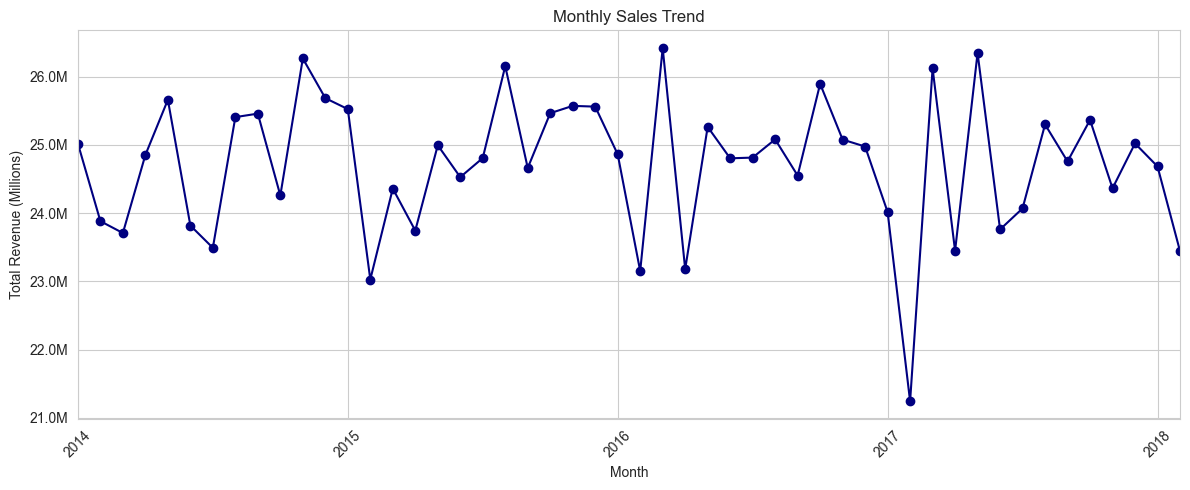

In [40]:
# Convering order_date to monthly period
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculating total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(12,5))

# Plotting monthly sales trend
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHTS 

- Sales consistently cycle between 24M and 26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

- The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

- However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

#### 2. Monthly Sales Trend (All Years Combined)
Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

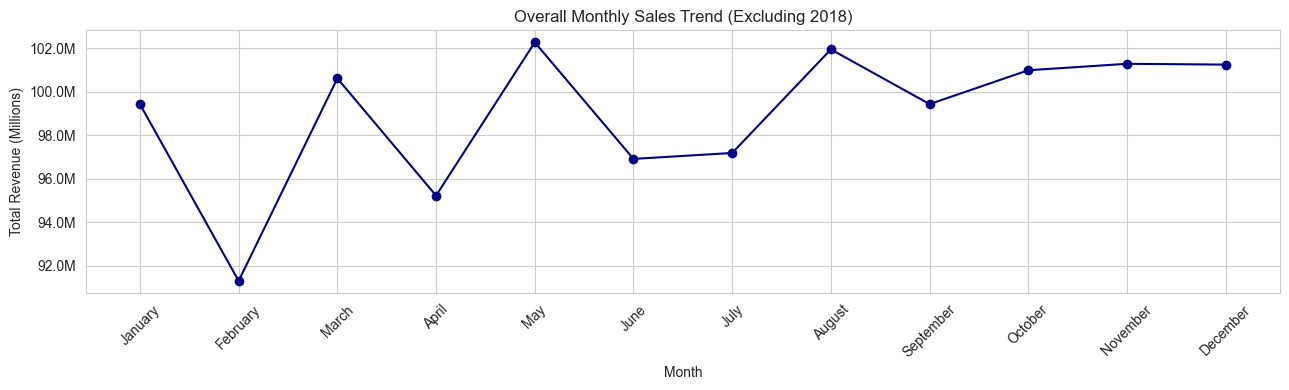

In [41]:
# Filtering out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]

monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHTS
- Across all years, January begins strong with roughly 99M, followed by a steep decline through April's slowpoint(at around 95M).

- Sales rebound in May and August(102M) be foresettling into a plateau of 99–101M from September to December.

- This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

#### 3. Top 10 Products by Revenue (in Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\447298071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


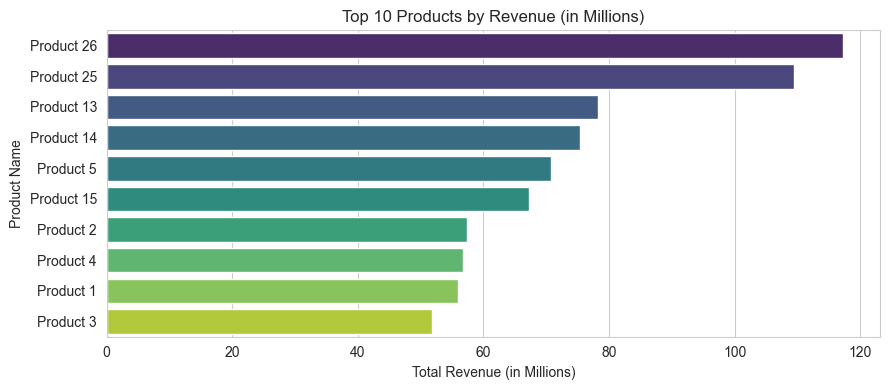

In [42]:
# Calculating total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

top_prod = top_prod.nlargest(10)

plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
    )
plt.title('Top 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

INSIGHTS
- Products 26 and 25 pull away at around 118M and 110 M, with a sharp drop at around 78M for Product 13.

- The bottom four cluster at 52-57M, highlighting similar constraints.

- Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

#### 4. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\2841458448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


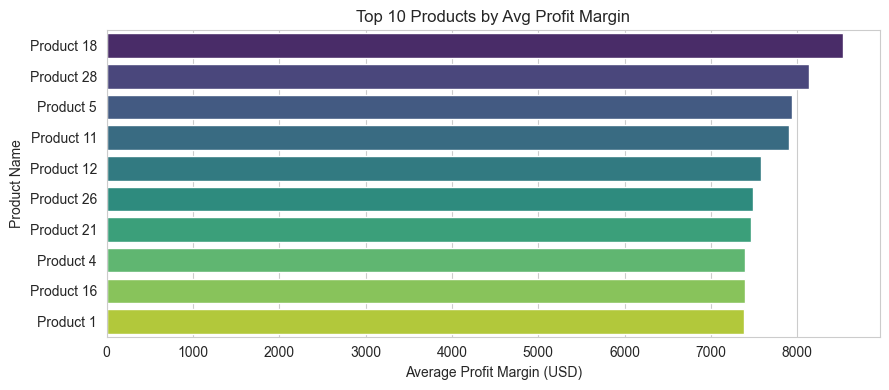

In [43]:
# Computing average profit per product and taking the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)

plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

INSIGHTS
- Products 18 and 28 lead with average profit margins of approximately 8-8.3K, followed closely by Product 5 and 11 at around 7.9–8K

- Mid-tier performers like Products 12, 26, and 21 cluster in the 7.77-7.8K range, while the bottom tier(Product 4,16 and 1) fall between 7.4-7.6K.

- Focusing on margin optimization strategies from top performers may help elevate overall product profitability.

#### 5. Sales by Channel
Goal: Show distribution of total sales across channels to identify dominant sales routes

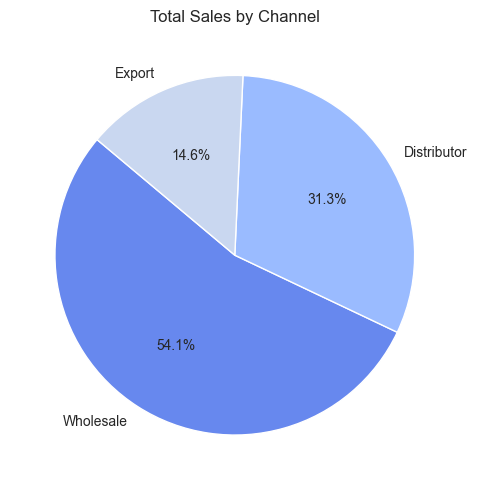

In [44]:
# Grouping revenue by sales channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))


plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

INSIGHTS
- Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

- To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

#### 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

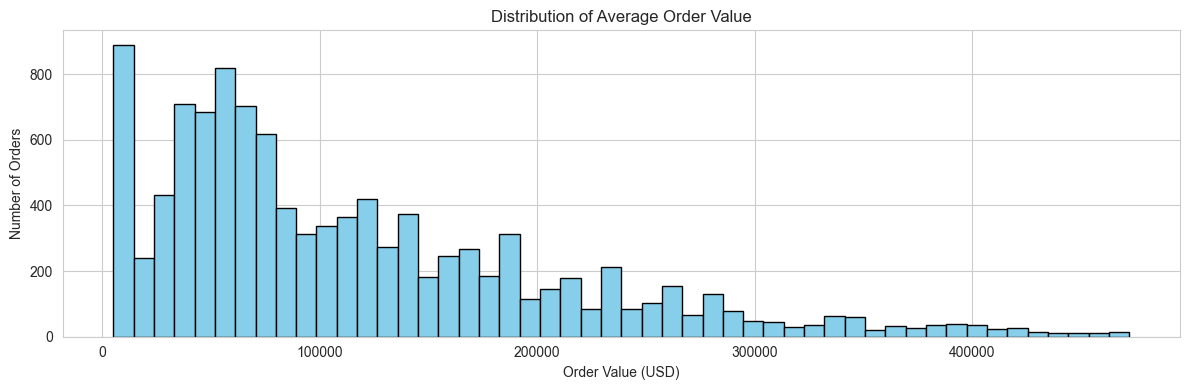

In [45]:
# Calculating the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

INSIGHTS
- The order‐value distribution is heavily right‐skewed, with most orders clustering between 20K and 120K and a pronounced mode around 50K-60K.

- A long tail of high-value transactions extends up toward 400K-500K, but these large orders represent only a small share of total volume.

#### 7. Profit Margin% vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

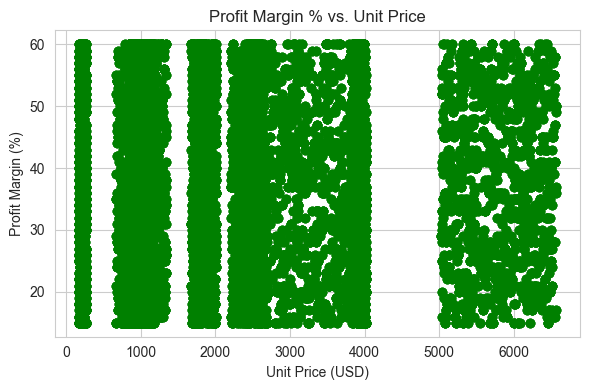

In [46]:
# Calculating profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))
plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)

plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

INSIGHTS
- Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near 0 to over 6,500.

- Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

- Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

#### 8. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

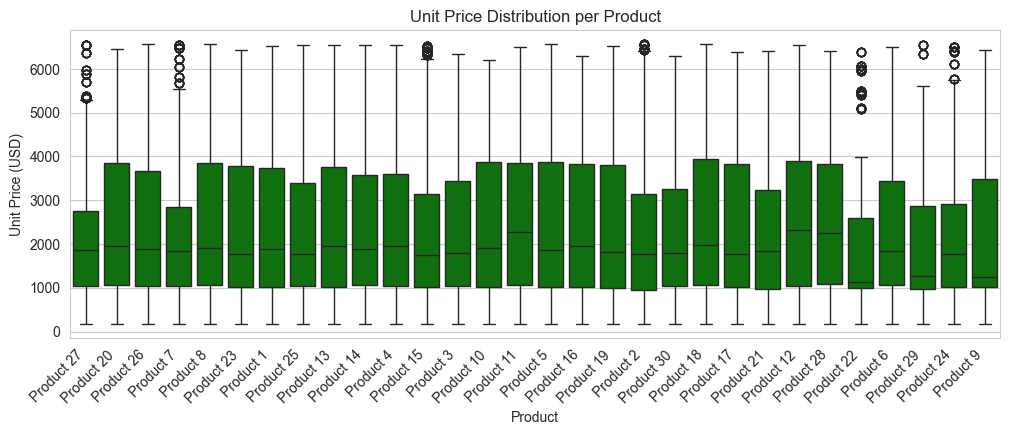

In [47]:
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

INSIGHTS
- Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

- In contrast, deep low-end outliers (near 0-100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

- To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

#### 9. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\2865490555.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


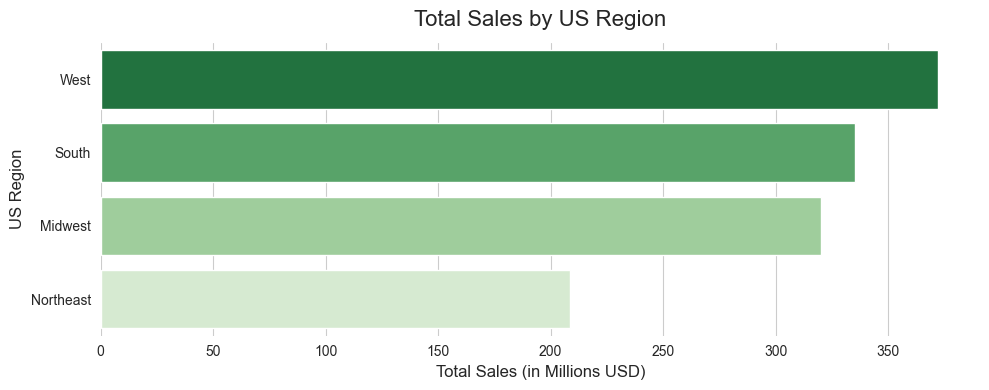

In [48]:
# 1. Aggregating total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)

plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

INSIGHTS
- West dominates with roughly $360 M in sales (~35 % of total), underscoring its market leadership.
- South & Midwest each contribute over $320 M (~32 %), indicating strong, consistent demand across central regions.
- Northeast trails at about $210 M (~20 %), signaling room for growth and targeted investment.
- Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.

#### 10. Total Sales by State
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

In [49]:
import plotly.express as px

# 1. Aggregating revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}
)

fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)
fig.show()

INSIGHTS 
- California leads with 230M, followed by Illinois (112 M) and Florida (90 M), forming a dominant top-tier(>90M).
- Mid‑tier states (e.g., Texas 85M, NewYork 55 M) hold steady performance but trail the top three by 40–145M.
Lower‑tier states (e.g., New Jersey 47M down to Massachusetts 35M) reveal a gradual drop, indicating uneven market penetration.
- Action: Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.

#### 11. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\1707211663.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\1707211663.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




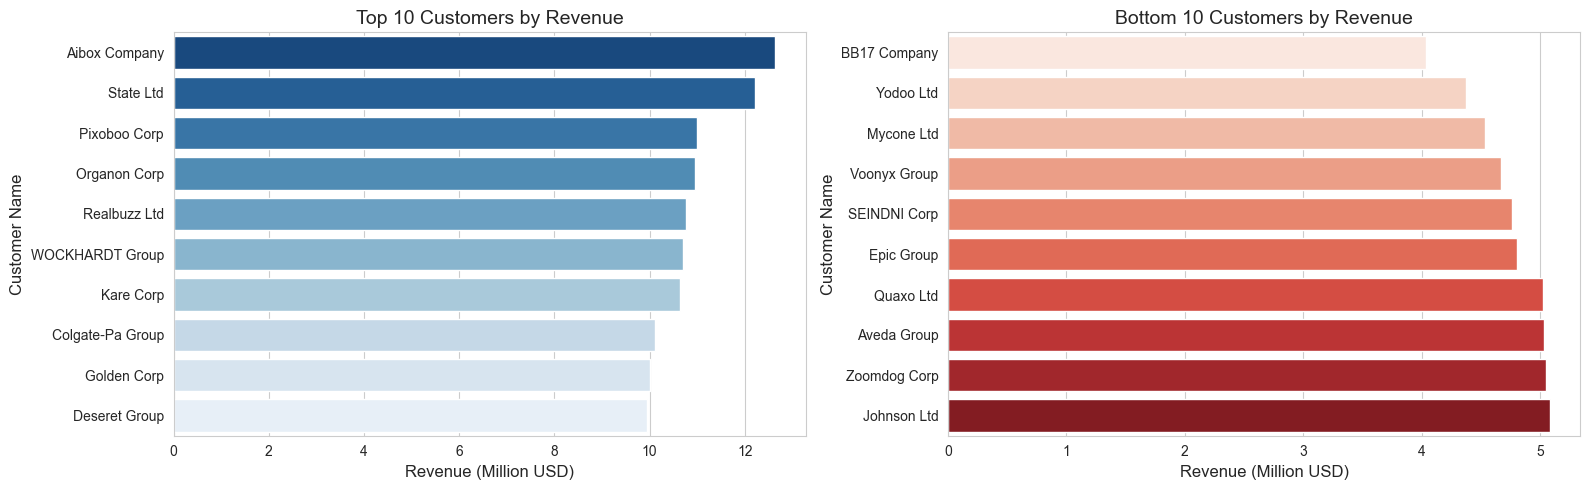

In [50]:
# Calculating total revenue per customer and selecting top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Calculate total revenue per customer and selecting bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1
sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

# Plot 2
sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()

INSIGHTS
- Aibox Company tops the list with 12.5M, followed closely by State Ltd(12.2M), while the 10th-ranked Deseret Group still contributes 9.9M demonstrating a tight 10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with 5.1M, down to BB17 company at 4.1M, roughly half the top customer’s revenue.

- This steep drop from ~10M + 4-5M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.

#### 12. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\3561770810.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




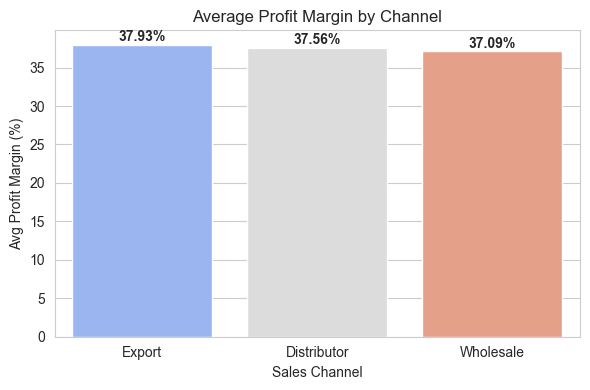

In [51]:
# Computing average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=channel_margin.index,
    y=channel_margin.values,
    palette='coolwarm'
)
plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Avg Profit Margin (%)')

# Annotating each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,
        v + 0.5,
        f"{v:.2f}%",
        ha='center',
        fontweight='bold'
    )
plt.tight_layout()
plt.show()

INSIGHTS
- Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

- The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

- This uniformity implies well-controlled costs and pricing power everywhere.

- To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

#### 13. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest and lowest revenue customers to tailor engagement strategies

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\2257009020.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




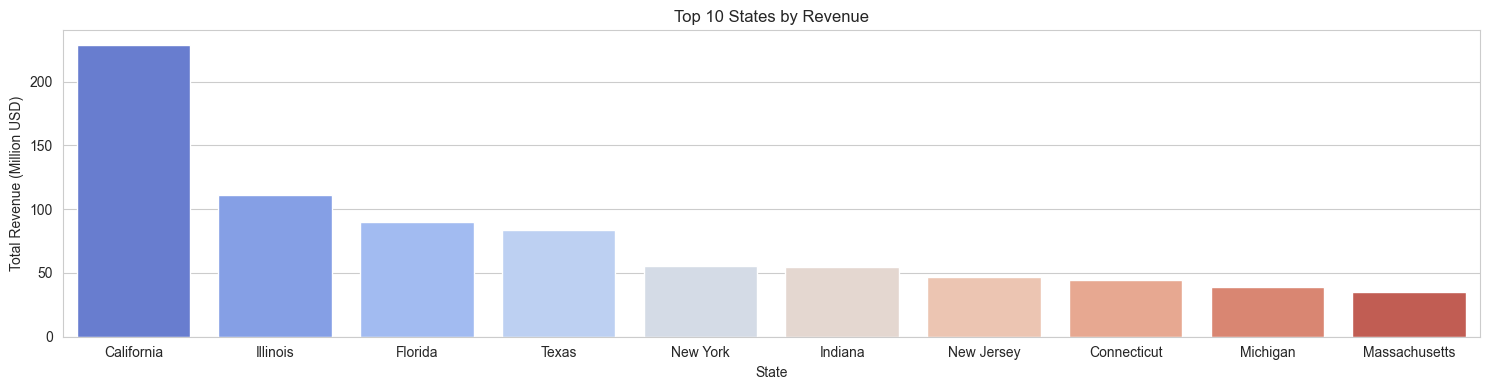

C:\Users\ISHAAN BHASKAR\AppData\Local\Temp\ipykernel_18932\2257009020.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




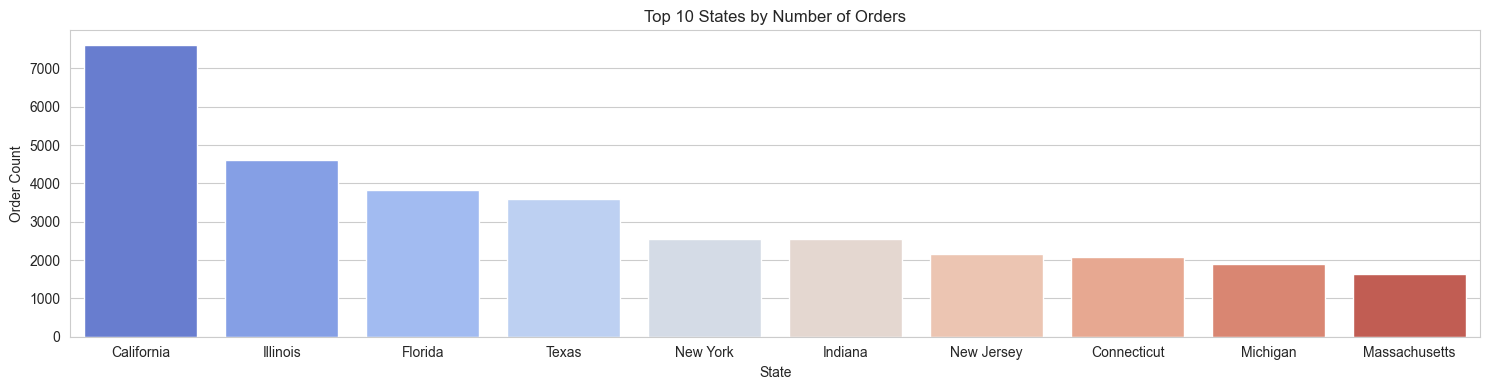

In [52]:
# Aggregating total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

# Plot 1
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

# Plot 2
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

#### 14. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

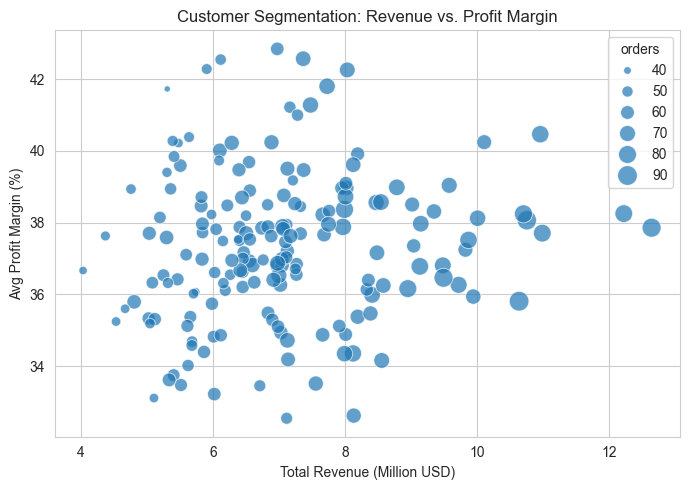

In [53]:
# Aggregating metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Converting revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')
plt.tight_layout()
plt.show()

INSIGHTS
- Customers with >$10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.
- Most customers cluster within the $6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier.
- Customers below $6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.
- Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

#### 15. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

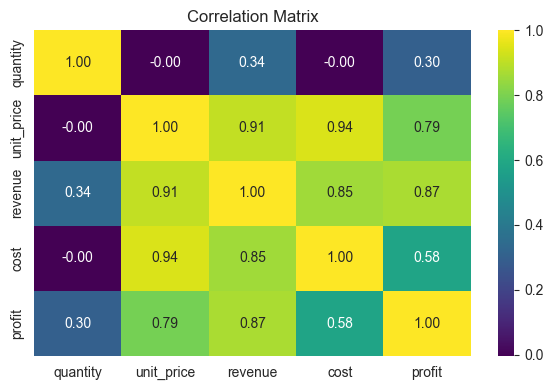

In [54]:
# Listing numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

INSIGHTS
- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
- Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
- Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

### Saving Pre-Processed Dataframe


In [56]:
print(df.head())
# Exporting Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

   order_number order_date     customer_name      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   quantity  unit_price  revenue      cost state  ...  us_region       lat  \
0         6      2499.1  14994.6  1824.343    GA  ...      South  32.08354   
1        11      2351.7  25868.7  1269.918    IN  ...    Midwest  39.61366   
2         6       978.2   5869.2   684.740    CA  ...       West  37.66243   
3         7      2338.3  16368.1  1028.852    IN  ...    Midwest  39.16533   
4         8      2291.4  18331.2  1260.270    CT  ...  Northeast  41.77524   

         lon  budget  total_cost     profit  profit_margin_pct  \
0  -81.09983     NaN

## Key Insights
- Monthly Revenue Cycle:
Revenue stays stable between ≈23M-26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

- Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

- Top Products (Revenue):
Product 26: 118M; Product 25:110M; Product 13:78M. Mid-tier:68-75M; bottom performers: $52–57M.

- Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

- Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

- Regional Performance:
California leads: ≈230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & ≈3500–4500 orders. NY/Indiana: ≈54M & 2000+ orders.

## Recommendations
1. Outlier Strategy: Exclude or formalize bulk-order and promotional SKUs when calculating averages.
2. Margin Uplift: Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.
3. Export Growth: Invest in targeted overseas marketing and distributor partnerships.
4. Seasonal Planning: Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.